### 서브 플롯
Matplotlib을 사용하여 하나의 그래프 영역을 나누어 두 개 이상의 시각화 결과물을 하나의 화면에서 표현할 수 있다.


In [1]:
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt

In [2]:
df = read_excel("http://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col="년도")
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


In [3]:

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

#### 01. 서브플롯 영역 나누기
##### 1) 2행 3열을 갖는 서브플롯 영역 생성하기

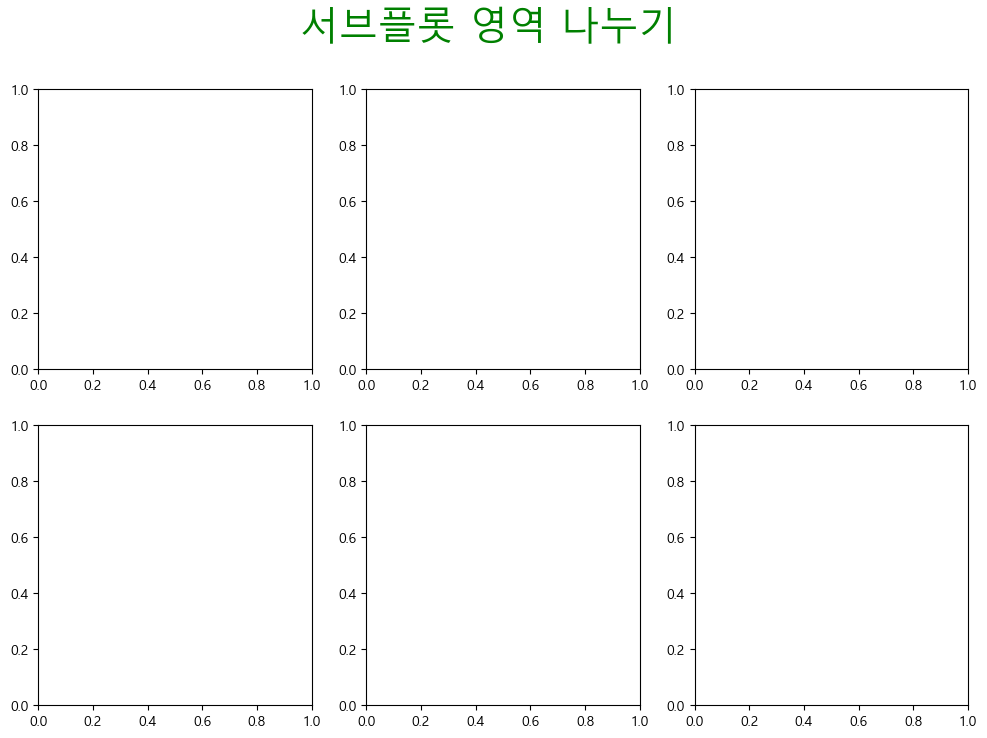

In [13]:
# 서브플롯 생성 -> 2행 3열
# -> fig객체: 그래픽 처리 기능을 제공
# -> ax객체: 분할된 각 그래프 영역(리스트)
fig, ax = plt.subplots(2,3)

# 전체 제목
fig.suptitle('서브플롯 영역 나누기', fontsize=28, color = 'green')

# 각 그래프 간의 가로(Wspace), 세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace= 0.2)

plt.show()
plt.close()

#### 02. 서브플롯에 그래프 그리기

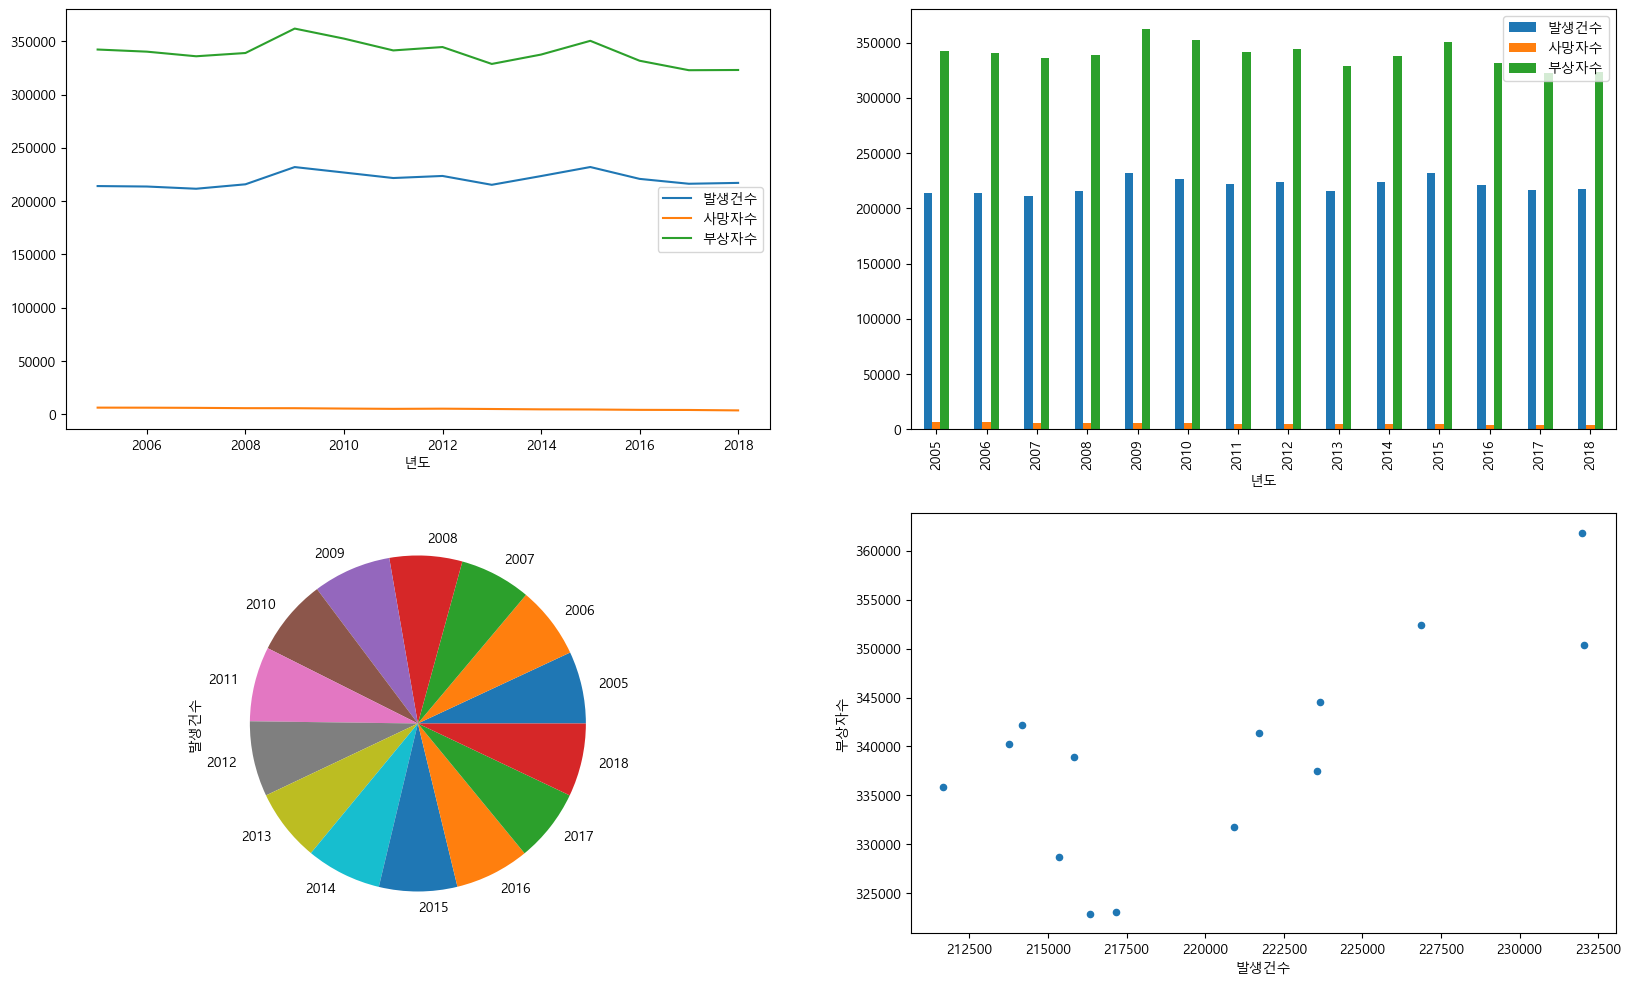

In [14]:
# 2행 2열의 영역을 생성한다.
# -> ax에 반환되는 객체는 서브플롯의 행, 열에 대한 n차원 리스트이다.
# -> figsize 파라미터는 그래픽의 크기, plt.rcParams['figure.figsize'] 설정보다 우선한다.
fig, ax = plt.subplots(2,2, figsize = (20,12))

# 데이터프레임을 기반으로 각 영역에 그래프를 종류별로 표시
df.plot(ax= ax[0][0]) # 선
df.plot.bar(ax=ax[0][1]) # 막대
df['발생건수'].plot.pie(ax=ax[1][0]) # 파이
df.plot.scatter(x='발생건수', y='부상자수', ax=ax[1][1])  #산점도

# 그래프 출력하기
plt.show()
plt.close()

#### 04. 서브플롯 영역에 옵션 지정하기

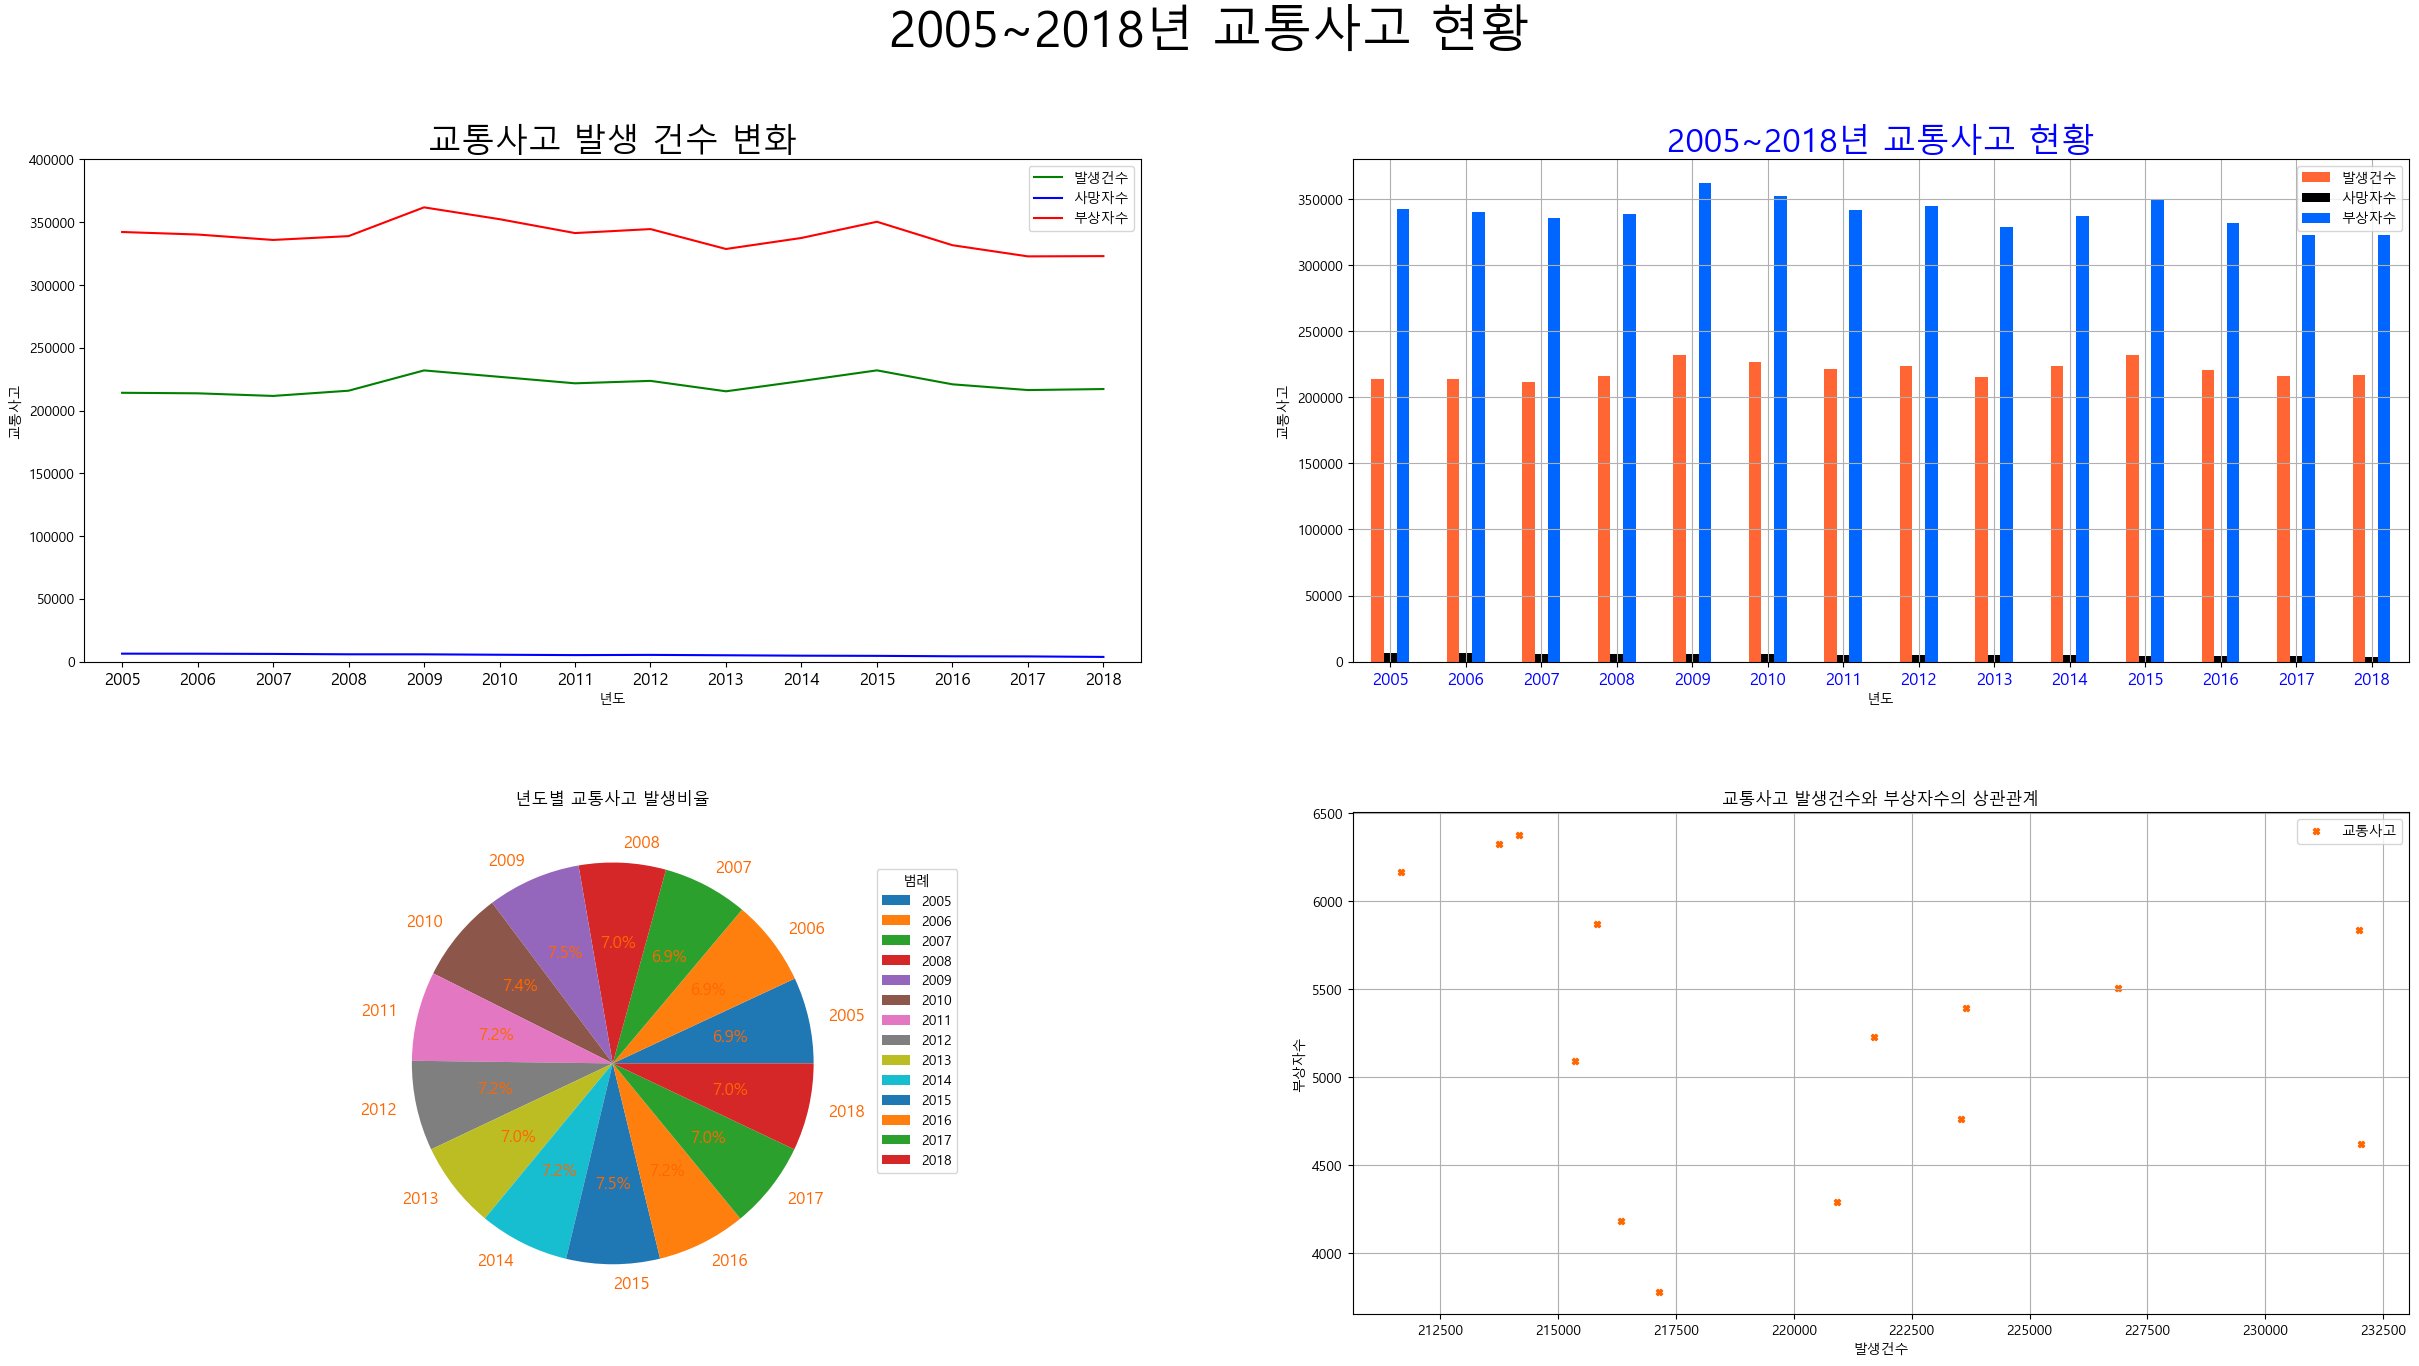

In [37]:
#----------------------------------------------------------------------------
# 2행 2열의 영역을 생성한다
#----------------------------------------------------------------------------
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(30,15))

# 전체 제목
fig.suptitle('2005~2018년 교통사고 현황', fontsize=36, color = '#000000')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.3)

#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 년도별 교통사고에 대한 선 그래프
#--------------------------------------------------------------
df.plot(ax= ax1, color =['green', 'blue','red'])

# 그래프 제목의 텍스트, 글자크기, 색상
ax1.title.set_text('교통사고 발생 건수 변화')
ax1.title.set_fontsize(24)
ax1.title.set_color('black')

# x축과 y축의 라벨을 지정
ax1.set(xlabel='년도', ylabel= '교통사고')

# plt를 직접 사용할 경우 xticks(x축 좌표, 표시할 텍스트) 형식으로 지정하지만
#서브 플롯은 x축의 좌표와 표시할 텍스트를 나누어서 처리한다.
start = min(df.index)
end= max(df.index)
x = list(range(start,end+1))
# - > 좌표 설정
ax1.set_xticks(x)
# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함
ax1.set_xticklabels(df.index, fontsize=12, color ="black")

# x축, y축의 범위
ax1.set_xlim([start-0.5, end+0.5])
ax1.set_ylim([0,400000])



# 두 번째 영역 그래프 표시 -> 막대 그래프
#--------------------------------------------------------------
# 막대 그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정
df.plot.bar(ax=ax2, rot=0, color=['#ff6633', '#000000', '#0066ff'])

# 배경 격자 표시
ax2.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax2.title.set_text('2005~2018년 교통사고 현황')
ax2.title.set_fontsize(24)
ax2.title.set_color('blue')

# x축의 자표만 지정함 (막대그래프의 경우 x축 좌푠는 무조건 0부터 시작함)
ax2.set_xticks(list(range(0,len(df.index))))

# 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함
ax2.set_xticklabels(df.index, fontsize=12, color = 'blue')

# x축과 y축의 라벨을 지정
ax2.set(xlabel='년도', ylabel='교통사고')

#--------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 파이 그래프
#--------------------------------------------------------------
# 파이그래프
df['발생건수'].plot.pie(ax=ax3, labels=df.index, autopct="%0.1f%%", 
                        textprops={'color':"#ff6600", 'fontsize': 12})
## 파이그래프는 Dataframe의 특정 column을 지정해줘야만 생성 가능

# 그래프 제목
ax3.title.set_text('년도별 교통사고 발생비율')

# 격자표시 -> 파이그래프인 경우는 표시 안됨
#ax3.grid()

# y축 라벨이 불피요하므로 제거
ax3.set(ylabel=None)

# 범주 표시
ax3.legend(labels=df.index, title='범례', bbox_to_anchor=(1.2,0.9))


#--------------------------------------------------------------
# 네 번째 영역 그래프 표시 -> 산점도 그래프
#--------------------------------------------------------------
# 산점도 그래프
df.plot.scatter(ax=ax4, x='발생건수', y='사망자수', color='#ff6600', marker='X', label='교통사고') # 인덱스 명만 쓰면 자동으로 인식

# 그래프 제목 지정
ax4.title.set_text("교통사고 발생건수와 부상자수의 상관관계")

# 배경 격자
ax4.grid()

# x축,y축 라벨
ax4.set(xlabel='발생건수', ylabel='부상자수')

#--------------------------------------------------------------
# 그래프 출력하기
#--------------------------------------------------------------
plt.show()
plt.close()


#### 05. 두 개의 y축을 갖는 그래프
##### 1) 샘플 데이터 만들기

##### x축 데이터(공용)

In [38]:
x= list(range(0,10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

##### 첫 번째 y축 데이터

In [39]:
y1 = list(range(0,10,1))
y1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

##### 두 번째 y축 데이터

In [41]:
y2 = list(np.arange(0,5,0.5))
y2

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

##### 2) 기본 그래프 구현

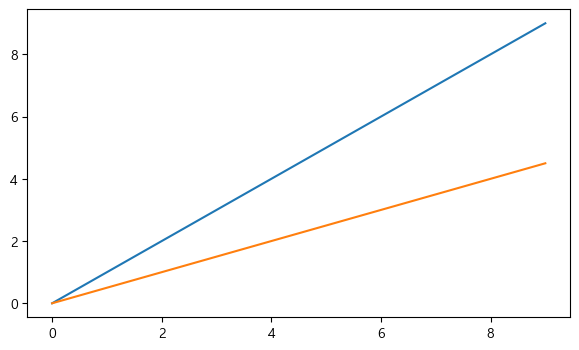

In [42]:
plt.rcParams['figure.figsize']=(7,4)

plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()
plt.close()

##### 2) 서브플롯으로 2개의 y축을 갖는 그래프 구현

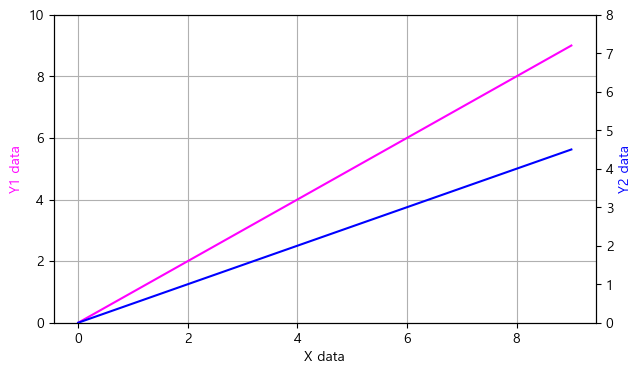

In [48]:
# 그래프 시작
fig, ax1 = plt.subplots(1,1, figsize=(7,4))

# ax1에 겹쳐지는 쌍둥이 서브플롯을 생성
ax2 = ax1.twinx()

# ax1에 그래프 그리기
ax1.plot(x, y1, color="#ff00ff")
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='#ff00ff')
ax1.grid()
ax1.set_ylim([0, 10])

#ax2에 그래프 그리기
ax2.plot(x,y2,color="blue")
ax2.set_ylabel('Y2 data', color = 'blue')
ax2.set_ylim([0,8])

plt.show()
plt.close()

#### 06.(예제) 교통사고 발생건수와 사망자수 변화 시각화하기
우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부개정령(안) 을 개정한 이후 꾸준히 교통사고안전기준을 강화해 왔다.<br>

이러한 노력이 교통사고 부상자수를 줄이는데 효과가 있었는지 알아보자

##### 그래프 그리기

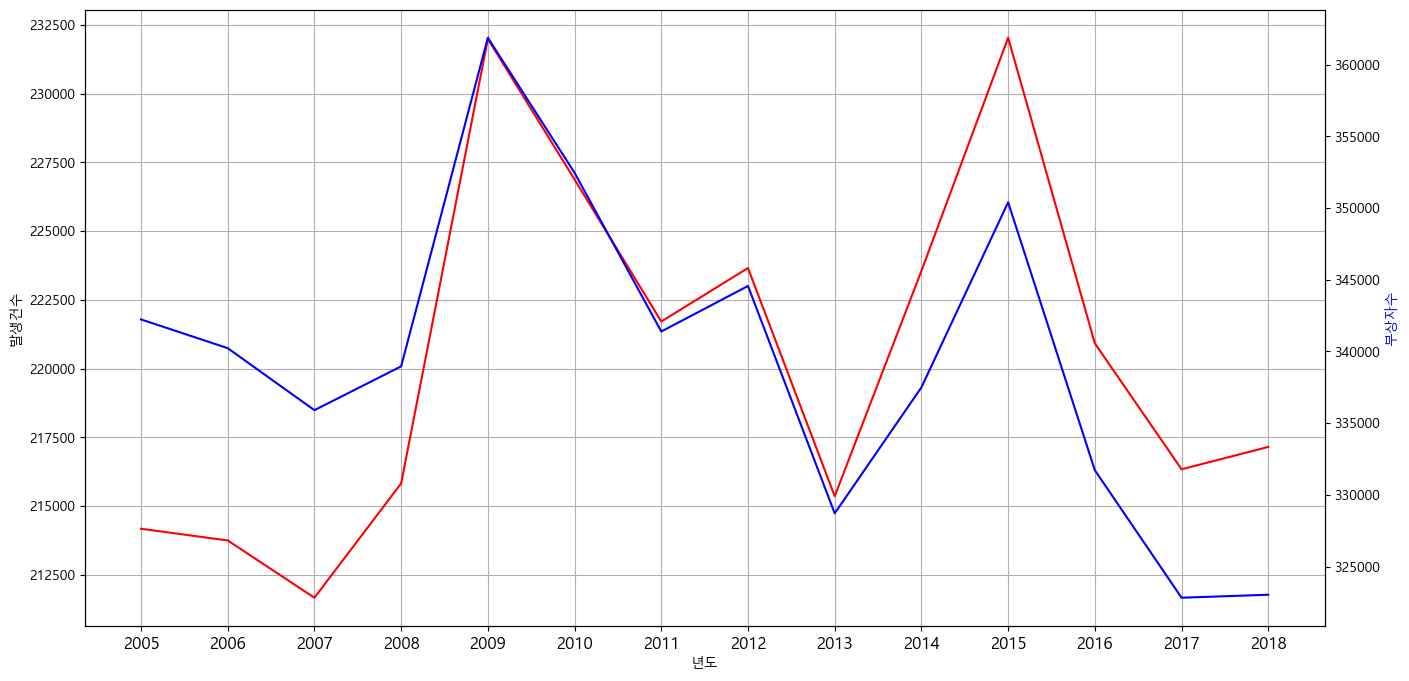

In [52]:
fig, ax1 = plt.subplots(1,1,figsize=(16,8)) #그래프 시작
ax2 = ax1.twinx()   # ax1에 겹쳐지는 서브플롯 생성

#ax1에 그래프 그리기
df['발생건수'].plot(ax=ax1, color="red")
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수', color= "black")
ax1.grid()

# x축 좌표위의 텍스트 처리
start = min(df.index)
end =  max(df.index)
ax1.set_xticks(list(range(start,end+1)))
ax1.set_xticklabels(df.index, fontsize=12, color = 'black')

# ax2에 그래프 그리기
df['부상자수'].plot(ax=ax2, color ='blue')
ax2.set_ylabel('부상자수', color = "blue")

plt.show()
plt.close()

2008년을 기점으로 부상자수와 발생건수의 차이가 점점 좁혀져서 2010년 중반부터 발생건수 그래프가 부상자수 그래프 위에 그려지는 것으로 보아 비율적으로 발생건수 대비 부상자수가 줄어든 것을 확인할 수 있다. 따라서 정책의 실행이 부상자를 줄이는데 효과를 가져온 것을 확인할 수 있다.